# Sales Performance & Customer Behavior Analysis

## 1. Data Loading and Inspection


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Fashion_Retail_Sales.csv")
df.head()

,Customer Reference ID,Item Purchased,Purchase Amount (USD),Date Purchase,Review Rating,Payment Method
0,4018,Handbag,4619.0,05-02-2023,NaN,Credit Card
1,4115,Tunic,2456.0,11-07-2023,2.0,Credit Card
2,4019,Tank Top,2102.0,23-03-2023,4.1,Cash
3,4097,Leggings,3126.0,15-03-2023,3.2,Cash
4,3997,Wallet,3003.0,27-11-2022,4.7,Cash


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer Reference ID  3400 non-null   int64  
 1   Item Purchased         3400 non-null   object 
 2   Purchase Amount (USD)  2750 non-null   float64
 3   Date Purchase          3400 non-null   object 
 4   Review Rating          3076 non-null   float64
 5   Payment Method         3400 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 159.5+ KB


In [3]:
df.describe()

,Customer Reference ID,Purchase Amount (USD),Review Rating
count,3400.000000,2750.000000,3076.000000
mean,4039.660588,156.709818,2.999057
std,48.122583,419.536669,1.156505
min,3957.000000,10.000000,1.000000
25%,3997.000000,57.000000,2.000000
50%,4040.000000,110.000000,3.000000
75%,4081.000000,155.750000,4.000000
max,4122.000000,4932.000000,5.000000


## 2. Data Cleaning and Preparation



In [4]:
df['Date Purchase'] = pd.to_datetime(df['Date Purchase'], dayfirst=True)

In [5]:
df.isnull().sum()


,0
Customer Reference ID,0
Item Purchased,0
Purchase Amount (USD),650
Date Purchase,0
Review Rating,324
Payment Method,0


In [6]:
df.columns = [
    'customer_id',
    'item',
    'purchase_amount',
    'purchase_date',
    'review_rating',
    'payment_method'
]

## 3. Sales Performance Analysis



In [10]:
total_revenue = round(total_revenue, 2)
total_revenue

np.float64(430952.0)

In [8]:
revenue_by_item = (
    df.groupby('item')['purchase_amount']
      .sum()
      .sort_values(ascending=False)
)

revenue_by_item.head(5)

,purchase_amount
item,
Tunic,17275.0
Jeans,13068.0
Pajamas,12798.0
Shorts,12702.0
Handbag,12668.0


In [11]:
revenue_by_item.head(3)

,purchase_amount
item,
Tunic,17275.0
Jeans,13068.0
Pajamas,12798.0


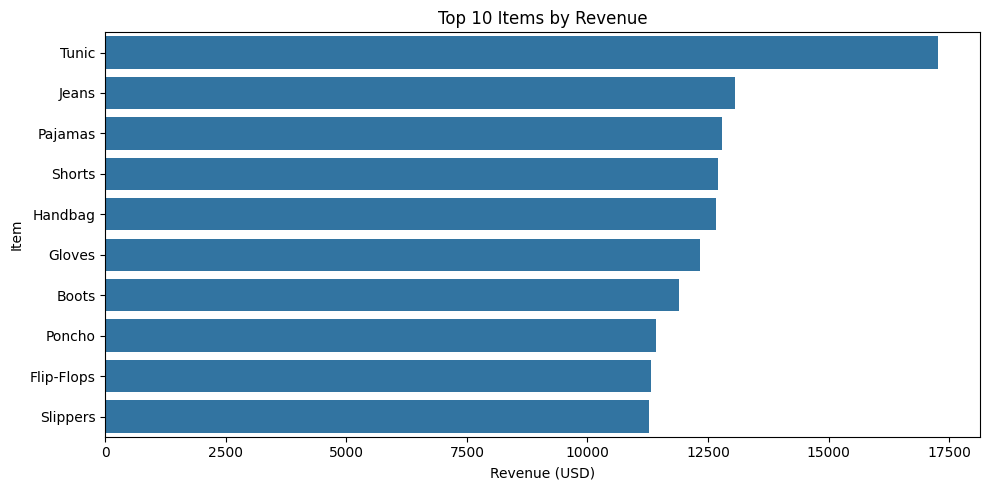

In [12]:
top_items = revenue_by_item.head(10)

plt.figure(figsize=(10,5))
sns.barplot(
    x=top_items.values,
    y=top_items.index
)
plt.title("Top 10 Items by Revenue")
plt.xlabel("Revenue (USD)")
plt.ylabel("Item")
plt.tight_layout()
plt.show()


## 4. Product Frequency Analysis


In [13]:
purchase_frequency = (
    df['item']
    .value_counts()
    .head(10)
)

purchase_frequency

,count
item,
Belt,90
Skirt,88
Shorts,87
Pants,86
T-shirt,82
Tank Top,82
Pajamas,81
Loafers,76
Camisole,76



## 5. Customer Satisfaction Analysis



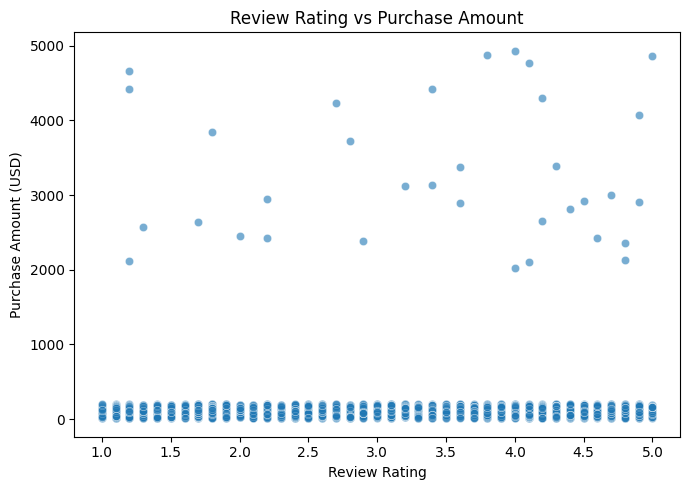

In [14]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    data=df,
    x='review_rating',
    y='purchase_amount',
    alpha=0.6
)
plt.title("Review Rating vs Purchase Amount")
plt.xlabel("Review Rating")
plt.ylabel("Purchase Amount (USD)")
plt.tight_layout()
plt.show()

In [16]:
df[['review_rating', 'purchase_amount']].corr()

,review_rating,purchase_amount
review_rating,1.000000,0.045135
purchase_amount,0.045135,1.000000



## 6. Payment Method Analysis


In [17]:
payment_revenue = (
    df.groupby('payment_method')['purchase_amount']
      .sum()
      .sort_values(ascending=False)
)

payment_revenue

,purchase_amount
payment_method,
Credit Card,230614.0
Cash,200338.0


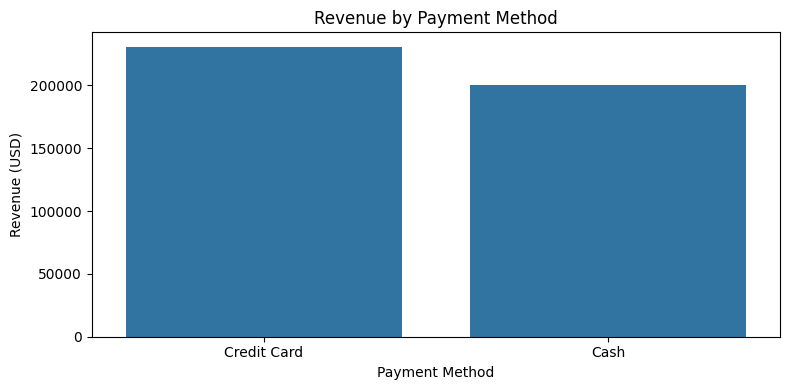

In [18]:
plt.figure(figsize=(8,4))
sns.barplot(
    x=payment_revenue.index,
    y=payment_revenue.values
)
plt.title("Revenue by Payment Method")
plt.xlabel("Payment Method")
plt.ylabel("Revenue (USD)")
plt.tight_layout()
plt.show()